In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
titanic = pd.read_csv("d:\BaiduNetdiskDownload/train.csv")
titanic_test = pd.read_csv("d:\BaiduNetdiskDownload/test.csv")
titanic_fin = titanic.append(titanic_test, ignore_index = True)
print(titanic_fin.describe())

               Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000  


In [11]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


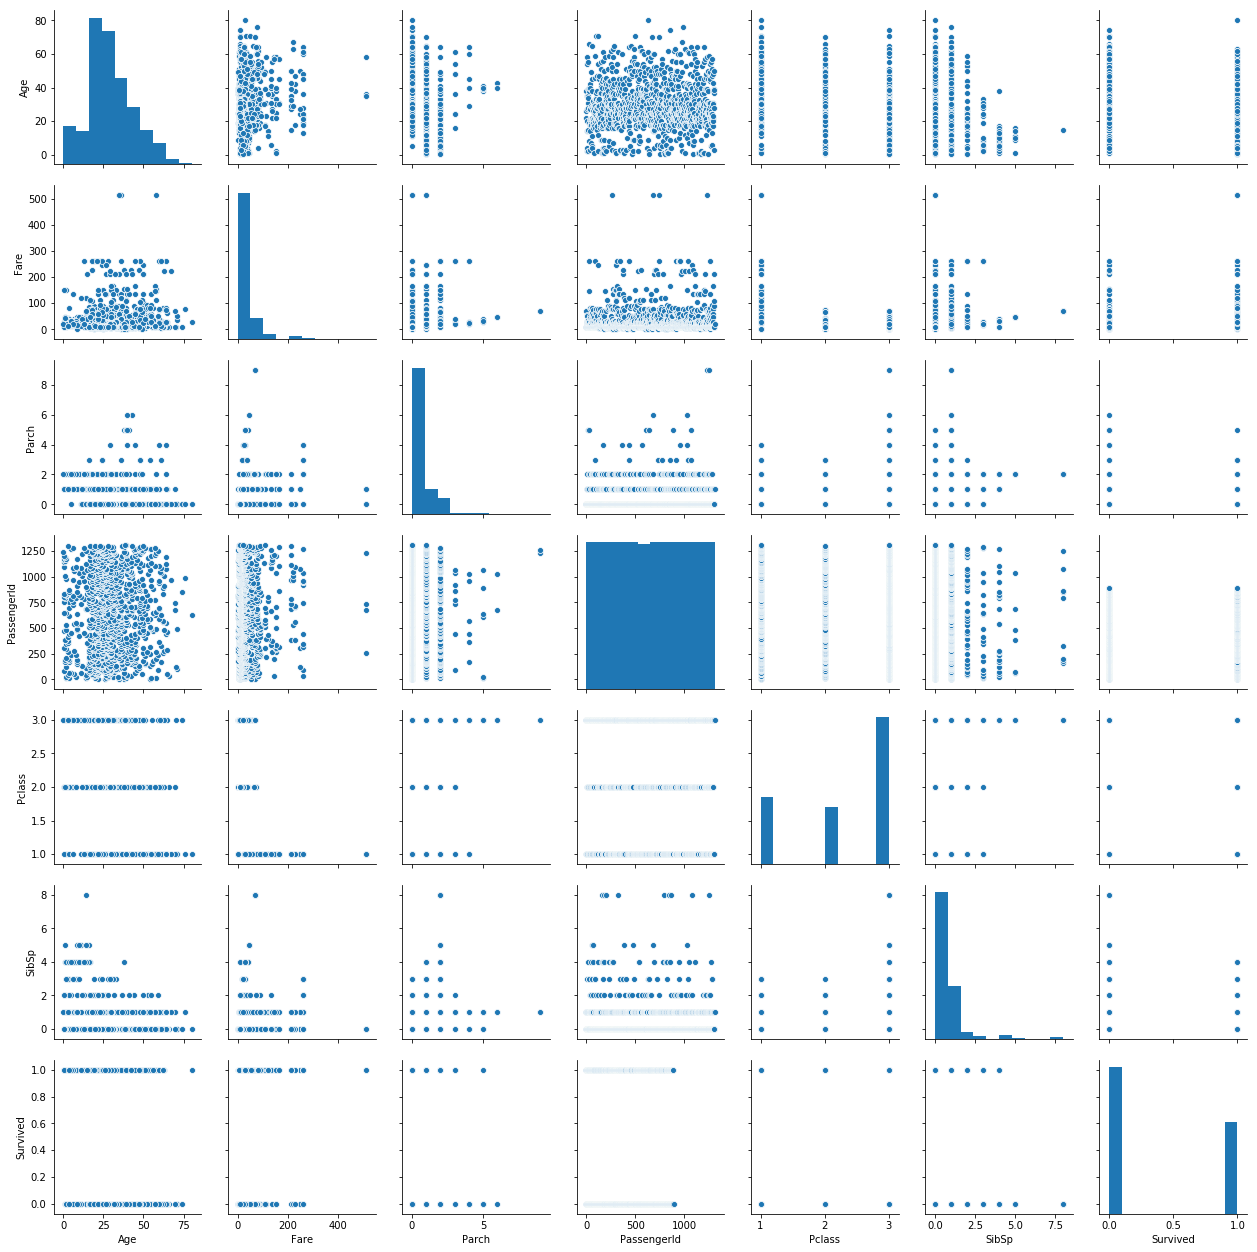

In [12]:
sns.pairplot(titanic_fin)

In [ ]:
#number replace
print(titanic['Sex'].unique())#几种可能性
titanic.loc[titanic['Sex']=='male','Sex'] = 0
titanic.loc[titanic['Sex']=='female','Sex'] = 1
titanic_fin.loc[titanic_fin['Sex']=='male','Sex'] = 0
titanic_fin.loc[titanic_fin['Sex']=='female','Sex'] = 1
#Embarked
titanic.loc[titanic['Embarked']=='S','Embarked'] = 1
titanic.loc[titanic['Embarked']=='C','Embarked'] = 2
titanic.loc[titanic['Embarked']=='Q','Embarked'] = 3
titanic_fin.loc[titanic_fin['Embarked']=='S','Embarked'] = 1
titanic_fin.loc[titanic_fin['Embarked']=='C','Embarked'] = 2
titanic_fin.loc[titanic_fin['Embarked']=='Q','Embarked'] = 3

In [14]:
#first fillna age
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic_fin['Age']=titanic_fin['Age'].fillna(titanic_fin['Age'].mean())
print(titanic['Embarked'].value_counts())
titanic['Embarked']=titanic['Embarked'].fillna('S')
titanic_fin['Embarked']=titanic_fin['Embarked'].fillna('S')
titanic_fin.info()

1    644
2    168
3     77
Name: Embarked, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(5), object(4)
memory usage: 122.8+ KB


In [52]:
titanic_fin['Age'] = pd.qcut(titanic_fin['Age'], 5)

TypeError: unsupported operand type(s) for -: 'pandas._libs.interval.Interval' and 'pandas._libs.interval.Interval'

In [15]:
train = titanic.drop('Cabin',axis=1)
datafull = titanic_fin.drop('Cabin',axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1


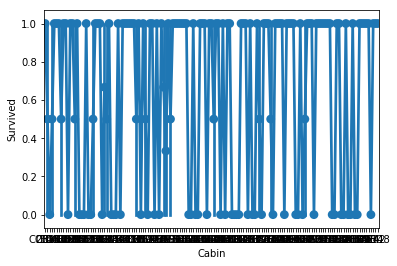

In [16]:
#The Cabin 
sns.pointplot(x='Cabin',y='Survived',data=titanic)

In [17]:
#Fare replace
train['Fare'] = pd.qcut(train['Fare'],q=3)
train['Fare'].unique()

[(-0.001, 8.662], (26.0, 512.329], (8.662, 26.0]]
Categories (3, interval[float64]): [(-0.001, 8.662] < (8.662, 26.0] < (26.0, 512.329]]

In [18]:
#family
familyDF = pd.DataFrame()
familyDF['familynumber'] = datafull['SibSp']+datafull['Parch']+1
familyDF['family_single'] = familyDF['familynumber'].map( lambda s: 1 if s==1 else 0)
familyDF['family_small'] = familyDF['familynumber'].map( lambda s: 2 if 2<=s<=4 else 0)
familyDF['family_large'] = familyDF['familynumber'].map( lambda s: 3 if s>=5 else 0)
familyDF.count()

familynumber     1309
family_single    1309
family_small     1309
family_large     1309
dtype: int64

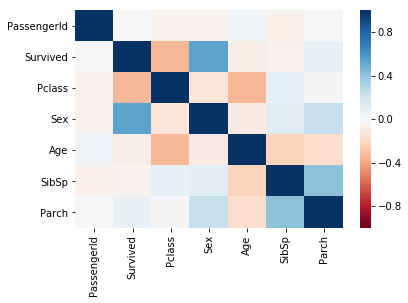

In [19]:
sns.heatmap(train.corr(),vmin=-1,vmax=1,cmap=sns.color_palette('RdBu',n_colors=128))
plt.show()#看出正负相关度

In [20]:
train['Fare'].unique()
fareDF = pd.DataFrame()
titanic_fin['Fare'] = titanic_fin['Fare'].fillna(titanic_fin['Fare'].mean())
fareDF['Fare'] = titanic_fin['Fare']
fareDF['low'] = titanic_fin['Fare'].map( lambda s: 1 if s<=9 else 0)
fareDF['medium'] = titanic_fin['Fare'].map( lambda s: 2 if 9<s<=26 else 0)
fareDF['high'] = titanic_fin['Fare'].map( lambda s: 3 if 26<s<=513 else 0)
fareDF.count()

Fare      1309
low       1309
medium    1309
high      1309
dtype: int64

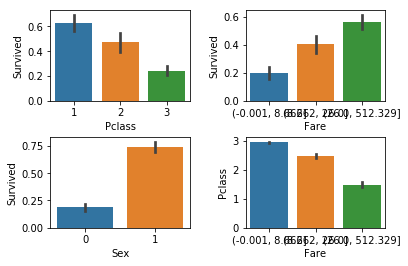

In [21]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = fig.add_subplot(2, 2, 1)
ax1 = sns.barplot(x='Pclass',y='Survived',data=train)
ax2 = fig.add_subplot(2, 2, 2)
ax2 = sns.barplot(x='Fare',y='Survived',data=train)
ax3 = fig.add_subplot(2, 2, 3)
ax3 = sns.barplot(x='Sex',y='Survived',data=train)
ax4 = fig.add_subplot(2, 2, 4)
ax4 = sns.barplot(y='Pclass',x='Fare',data=train)

In [32]:
#name title
def get_name(name):
    str1 = name.split(',')[1]
    str2 = str1.split('.')[0]
    strf = str2.strip()
    return strf

titleDF = pd.DataFrame()
titleDF['Title'] = titanic['Name'].map(get_name)
titleDF.count()

Title    891
dtype: int64

In [34]:
import re
titanic_fin['NameLength']=titanic_fin['Name'].apply(lambda x:len(x))

def get_title(name):
     # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one occurs.
titles = titanic_fin["Name"].apply(get_title)
print(pd.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2,"Dona":9}
for k,v in title_mapping.items():
    titles[titles == k] = v

# Verify that we converted everything.
print(pd.value_counts(titles))

# Add in the title column.
titanic_fin["Title"] = titles

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Countess      1
Jonkheer      1
Mme           1
Dona          1
Capt          1
Don           1
Lady          1
Sir           1
Name: Name, dtype: int64
1     757
2     262
3     197
4      61
6       8
5       8
7       7
10      3
9       3
8       3
Name: Name, dtype: int64


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
titanic_fin['Age'] =  MinMaxScaler().fit_transform(titanic_fin['Age'].values.reshape(-1,1)).reshape(1,-1)[0]
titanic_fin['Fare'] =  MinMaxScaler().fit_transform(titanic_fin['Fare'].values.reshape(-1,1)).reshape(1,-1)[0]
titanic_fin['Title'] = pd.to_numeric(titanic_fin['Title'])
sourceRow = 891
predictors = titanic_fin.loc[0:sourceRow-1,:]
predictors = titanic_fin.drop(['PassengerId','Survived','Name','Ticket','Fare','Cabin'],axis=1)
x1 = pd.concat([familyDF, titanic_fin['Title'], titanic_fin['Age'], titanic_fin['Sex'], titanic_fin['Embarked'],titanic_fin['Fare']],axis=1)
x =  x1.loc[0:sourceRow-1,:]
y = titanic_fin.loc[0:sourceRow-1,'Survived']   
lr = LinearRegression()

x_tt,x_validation,y_tt,y_validation = train_test_split(x,y,test_size = 0.2)
x_train,x_test,y_train,y_test = train_test_split(x_tt,y_tt,test_size = 0.25)
print(len(x_train),len(x_validation),len(x_test))
 
#预测数据集：特征
pred_x = x1.loc[sourceRow:,:]
'''
确保这里原始数据集取的是前891行的数据，不然后面模型会有错误
'''
#原始数据集有多少行
print('原始数据集有多少行:',x.shape[0])
#预测数据集大小
print('预测数据集有多少行:',pred_x.shape[0])

534 179 178
原始数据集有多少行: 891
预测数据集有多少行: 418


In [48]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 130 to 144
Data columns (total 9 columns):
familynumber     534 non-null int64
family_single    534 non-null int64
family_small     534 non-null int64
family_large     534 non-null int64
Title            534 non-null int64
Age              534 non-null float64
Sex              534 non-null int64
Embarked         534 non-null object
Fare             534 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 41.7+ KB


In [37]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
features= x
label = y
regr=LinearRegression()
regr=Ridge(alpha=1)
regr=Lasso(alpha=0.001)
regr.fit(features.values,label.values)
y_pred=regr.predict(features.values)
print("Coef:拟合参数",regr.coef_)
from sklearn.metrics import mean_squared_error#判断好坏
print("MSE:",mean_squared_error(y_pred,label.values))

ValueError: could not convert string to float: 'S'

In [38]:
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(solver="sag",max_iter=10000)
#可见这个不是单纯的线性可以解决，需要高维解决
lgr.fit(x_train,y_train)
y_pred = lgr.predict(x_validation)
print("ACC:",accuracy_score(y_validation,y_pred))
print("REC:",recall_score(y_validation,y_pred))
print("F-Score:",f1_score(y_validation,y_pred))

ValueError: could not convert string to float: 'S'

In [39]:
#add feacture
from sklearn.preprocessing import MinMaxScaler
predictors['Age'] =  MinMaxScaler().fit_transform(predictors['Age'].values.reshape(-1,1)).reshape(1,-1)[0]
train_fin = pd.concat([familyDF,fareDF,predictors],axis=1)

In [40]:
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
x = x
y = train['Survived']
lr = LinearRegression()

lgr = LogisticRegression(solver="sag",max_iter=10000)
#可见这个不是单纯的线性可以解决，需要高维解决
lgr.fit(x_train,y_train)
y_pred = lgr.predict(x_validation)
print("ACC:",accuracy_score(y_validation,y_pred))
print("REC:",recall_score(y_validation,y_pred))
print("F-Score:",f1_score(y_validation,y_pred))

ValueError: could not convert string to float: 'S'

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rfc_clf = RandomForestClassifier(n_estimators=11,max_features=None)
rfc_clf.fit(x_train,y_train)
y_pred = rfc_clf.predict(x_validation)
print("random forest:\nACC:",accuracy_score(y_validation,y_pred))
print("REC:",recall_score(y_validation,y_pred))
print("F-Score:",f1_score(y_validation,y_pred))
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_tt,y_tt)
y_pred = dtc_clf.predict(x_validation)
print("decide tree:\nACC:",accuracy_score(y_validation,y_pred))
print("REC:",recall_score(y_validation,y_pred))
print("F-Score:",f1_score(y_validation,y_pred))
print(rfc_clf.score(x_test,y_test))
print(dtc_clf.score(x_test,y_test))

ValueError: could not convert string to float: 'S'

In [42]:
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
x2 = dmatrices(formula_ml, data=x1, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y2 = np.
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x2, y2)

# Score the results
score = results_rf.score(x2, y2)

SyntaxError: invalid syntax (<ipython-input-42-11c80e3b8c59>, line 6)

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([100,90,80,70,60,50,40,30,20,10,1,0.1,0.01,0.001,0.0001,0])
# create and fit a ridge regression model, testing each alpha
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)
print(grid)
# summarize the results of the grid search
print("best score:",grid.best_score_)
print("best alpha:",grid.best_estimator_.alpha)
y_pred = grid.predict(x_validation)
print(grid.score(x_test,y_test))

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+02, 9.e+01, 8.e+01, 7.e+01, 6.e+01, 5.e+01, 4.e+01, 3.e+01,
       2.e+01, 1.e+01, 1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
best score: 0.36705791150517797
best alpha: 1.0


D:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.47278e-17): result may not be accurate.
  overwrite_a=True).T
D:\Anaconda\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.05893e-17): result may not be accurate.
  overwrite_a=True).T


ValueError: could not convert string to float: 'S'

In [44]:

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import numpy as np

basemodel1 = XGBClassifier()
basemodel2 = lgb.LGBMClassifier()
basemodel3 = RandomForestClassifier(random_state=1)

lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[basemodel1, basemodel2, basemodel3], 
                          meta_classifier=lr)
 
print('5-fold cross validation:\n')
 
for basemodel, label in zip([basemodel1, basemodel2, basemodel3, sclf], 
                      ['xgboost', 
                       'lightgbm', 
                       'Random Forest',
                       'StackingClassifier']):
 
    scores = model_selection.cross_val_score(basemodel,x_tt,y_tt, 
                                              cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

5-fold cross validation:



D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Embarked

In [45]:
sclf.fit(x_train, y_train)
y_pred = sclf.predict(x_test)
print("ACC:",accuracy_score(y_test,y_pred))
print("REC:",recall_score(y_test,y_pred))
print("F-Score:",f1_score(y_test,y_pred))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Embarked

In [46]:
#还没跑出来，太慢了
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

parameters = {
              'max_depth': [5, 10, 15, 20, 25],
              'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15],
              'n_estimators': [500, 1000, 2000, 3000, 5000],
              'min_child_weight': [0, 2, 5, 10, 20],
              'max_delta_step': [0, 0.2, 0.6, 1, 2],
              'subsample': [0.6, 0.7, 0.8, 0.85, 0.95],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9],
              'reg_alpha': [0, 0.25, 0.5, 0.75, 1],
              'reg_lambda': [0.2, 0.4, 0.6, 0.8, 1],
              'scale_pos_weight': [0.2, 0.4, 0.6, 0.8, 1]

}

xlf = xgb.XGBClassifier(max_depth=10,
            learning_rate=0.01,
            n_estimators=2000,
            silent=True,
            objective='binary:logistic',
            nthread=-1,
            gamma=0,
            min_child_weight=1,
            max_delta_step=0,
            subsample=0.85,
            colsample_bytree=0.7,
            colsample_bylevel=1,
            reg_alpha=0,
            reg_lambda=1,
            scale_pos_weight=1,
            seed=1440,
            missing=None)
            
# 有了gridsearch我们便不需要fit函数
gsearch = GridSearchCV(xlf, param_grid=parameters, scoring='accuracy', cv=3)
gsearch.fit(x_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))


D:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields Embarked

In [ ]:
pred_Y = sclf.predict(pred_x)
 
'''
生成的预测值是浮点数（0.0,1,0）
但是Kaggle要求提交的结果是整型（0,1）
所以要对数据类型进行转换
'''
pred_Y=pred_Y.astype(int)
#乘客id
passenger_id = titanic_fin.loc[sourceRow:,'PassengerId']
#数据框：乘客id，预测生存情况的值
predDf = pd.DataFrame( 
    { 'PassengerId': passenger_id , 
     'Survived': pred_Y } )
predDf.shape
predDf.head()
#保存结果
predDf.to_csv( 'titanic_pred5.csv' , index = False )

In [70]:
pred_y = lgr.predict(pred_x)
pred_y=pred_y.astype(int)

In [71]:
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
#y, x = dmatrices(formula_ml, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
#y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x_trian, y_trian)

# Score the results
score = results_rf.score(x_train, y_train)

NameError: name 'x_trian' is not defined